In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
from numpy.random import randn
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# load the data

In [3]:
blocked_members = pd.read_csv('blocked_members.csv') # 19281 blocked members (at least one block/ban)
active_harassers = pd.read_csv('active_harassers.csv') # 1026 harassers (harassers who are active for more than 200 days)
active_normal_members = pd.read_csv('active_normal_members.csv') # 13738 active members (Members who have > 21 conver.)
frequent_harassers = pd.read_csv('frequent_harassers.csv') # 315 harassers (Harassers who are blocked > 10 times)


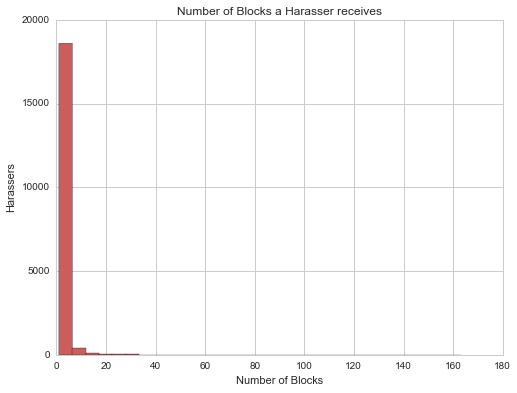

In [7]:
plt.figure(figsize=(8, 6))
plt.hist(blocked_members['number_blocks'],color='indianred',bins=30) # Number of Blocks a Harasser recieves 
plt.title('Number of Blocks a Harasser receives')
plt.xlabel('Number of Blocks')
plt.ylabel('Harassers')
plt.savefig("NumberBlocks.pdf",transparent=True)

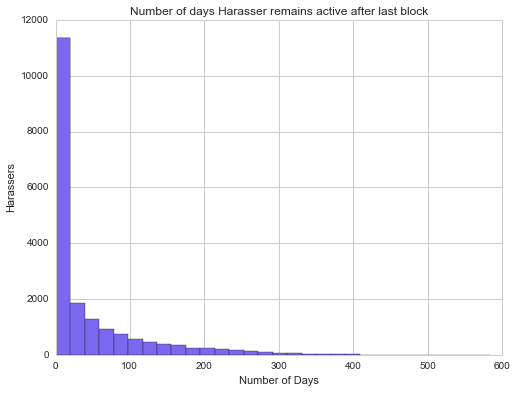

In [34]:
plt.figure(figsize=(8, 6))
plt.hist(blocked_members['llu_minus_bt'],color='mediumslateblue',bins=30) # Number of Days a Harasser remains active after last block
plt.title('Number of days Harasser remains active after last block')
plt.xlabel('Number of Days')
plt.ylabel('Harassers')
plt.savefig("DaysActive.pdf",facecolor='white')

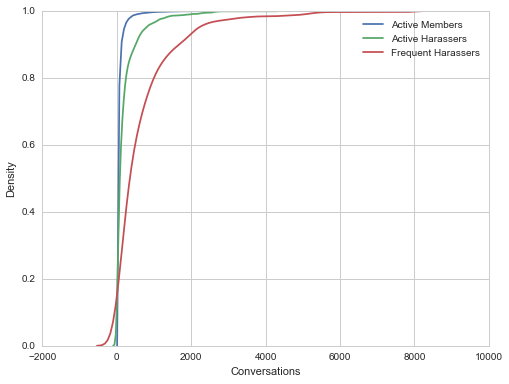

In [9]:
# CDF of Number of Conversations
plt.figure(figsize=(8, 6))
fig = sns.kdeplot(active_normal_members['numConversations'],cumulative=True,label='Active Members') 
fig = sns.kdeplot(active_harassers['numConversations'],cumulative=True,label='Active Harassers')
fig = sns.kdeplot(frequent_harassers['numConversations'],cumulative=True,label='Frequent Harassers')
fig.set(xlabel='Conversations', ylabel='Density')
plt.savefig('nc.pdf',facecolor='white')

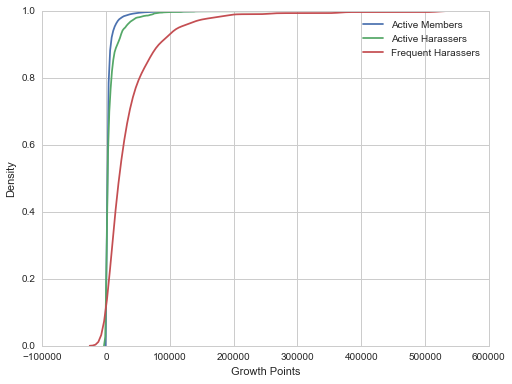

In [10]:
# CDF of Growth Points
plt.figure(figsize=(8, 6))
fig = sns.kdeplot(active_normal_members['growthPoints'],cumulative=True,label='Active Members')
fig = sns.kdeplot(active_harassers['growthPoints'],cumulative=True,label='Active Harassers')
fig = sns.kdeplot(frequent_harassers['growthPoints'],cumulative=True,label='Frequent Harassers')
fig.set(xlabel='Growth Points',ylabel='Density')
plt.savefig('gp.pdf',facecolor='white')

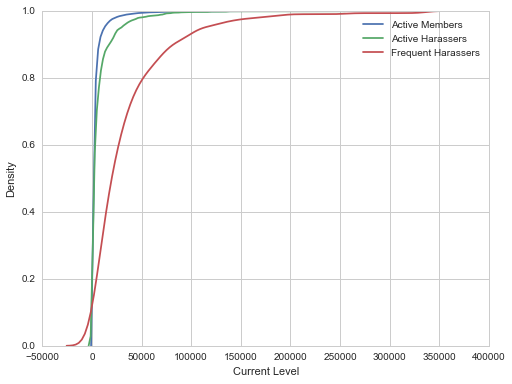

In [11]:
# CDF of Current Level
plt.figure(figsize=(8, 6))
fig = sns.kdeplot(active_normal_members['currentLevel'],cumulative=True,label='Active Members')
fig = sns.kdeplot(active_harassers['currentLevel'],cumulative=True,label='Active Harassers')
fig = sns.kdeplot(frequent_harassers['currentLevel'],cumulative=True,label='Frequent Harassers')
fig.set(xlabel='Current Level', ylabel='Density')
plt.savefig('cl.pdf',facecolor='white')

[<matplotlib.text.Text at 0x1110adf60>, <matplotlib.text.Text at 0x1110edf98>]

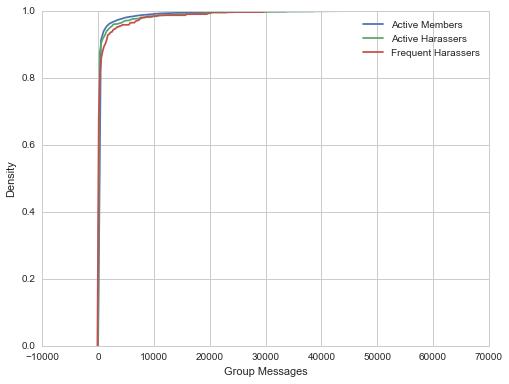

In [12]:
# CDF of Number of Group Messages 
plt.figure(figsize=(8, 6))
fig = sns.kdeplot(active_normal_members['groupSupportMsgs'],cumulative=True,label='Active Members')
fig = sns.kdeplot(active_harassers['groupSupportMsgs'],cumulative=True,label='Active Harassers')
fig = sns.kdeplot(frequent_harassers['groupSupportMsgs'],cumulative=True,label='Frequent Harassers')
fig.set(xlabel='Group Messages', ylabel='Density')

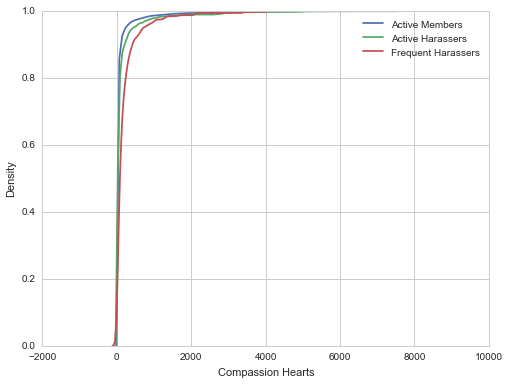

In [13]:
# CDF of Compassion Hearts 
plt.figure(figsize=(8, 6))
fig = sns.kdeplot(active_normal_members['compassionHearts'],cumulative=True,label='Active Members')
fig = sns.kdeplot(active_harassers['compassionHearts'],cumulative=True,label='Active Harassers')
fig = sns.kdeplot(frequent_harassers['compassionHearts'],cumulative=True,label='Frequent Harassers')
fig.set(xlabel='Compassion Hearts', ylabel='Density')
plt.savefig('ch.pdf',facecolor='white')

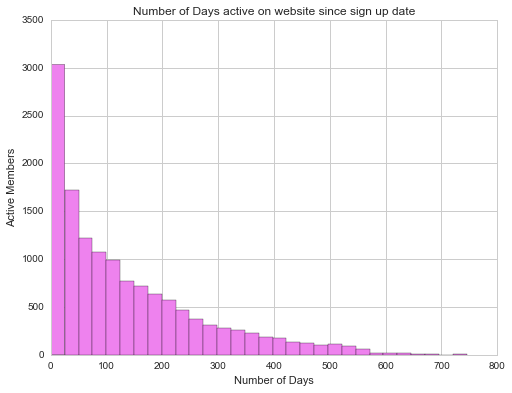

In [14]:
# Number of days active since sign up on the website
plt.figure(figsize=(8, 6))
plt.hist(active_normal_members['llu_minus_sud'],color='violet',bins=30)
plt.title('Number of Days active on website since sign up date ')
plt.xlabel('Number of Days')
plt.ylabel('Active Members')
plt.savefig('DaysActive_signup.pdf',facecolor='white')

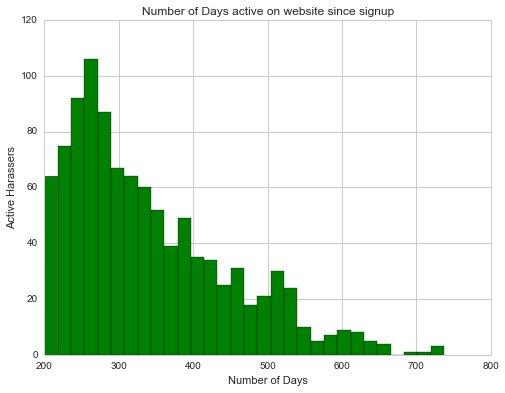

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(active_harassers['llu_minus_sud'],color='green',bins=30)
plt.title('Number of Days active on website since signup')
plt.xlabel('Number of Days')
plt.ylabel('Active Harassers')
plt.savefig('DaysActive1_signup.pdf',facecolor='white')

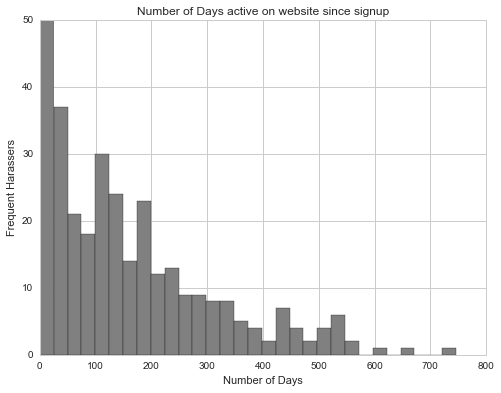

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(frequent_harassers['llu_minus_sud'],color='gray',bins=30)
plt.title('Number of Days active on website since signup')
plt.xlabel('Number of Days')
plt.ylabel('Frequent Harassers')
plt.savefig('DaysActive2_signup.pdf',facecolor='white')

In [20]:
active_har_pairs = active_harassers.loc[:,['growthPoints','numConversations','currentLevel','groupSupportMsgs','compassionHearts']]
freq_har_pairs = frequent_harassers.loc[:,['growthPoints','numConversations','currentLevel','groupSupportMsgs','compassionHearts']]
active_norm_pairs = active_normal_members.loc[:,['growthPoints','numConversations','currentLevel','groupSupportMsgs','compassionHearts']]

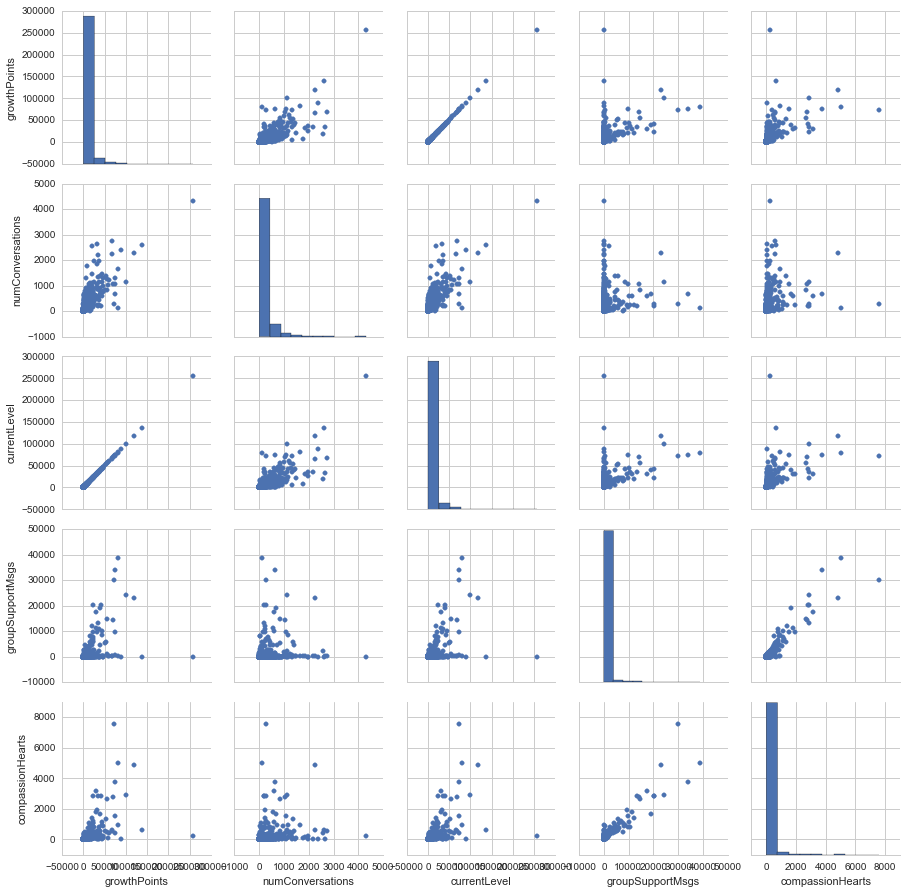

In [26]:
sns.pairplot(active_har_pairs.dropna()) 

Pairplot between the features growthPoints, numConversations, currentLevel, groupSupportMsgs, compassionHearts of active harassers.

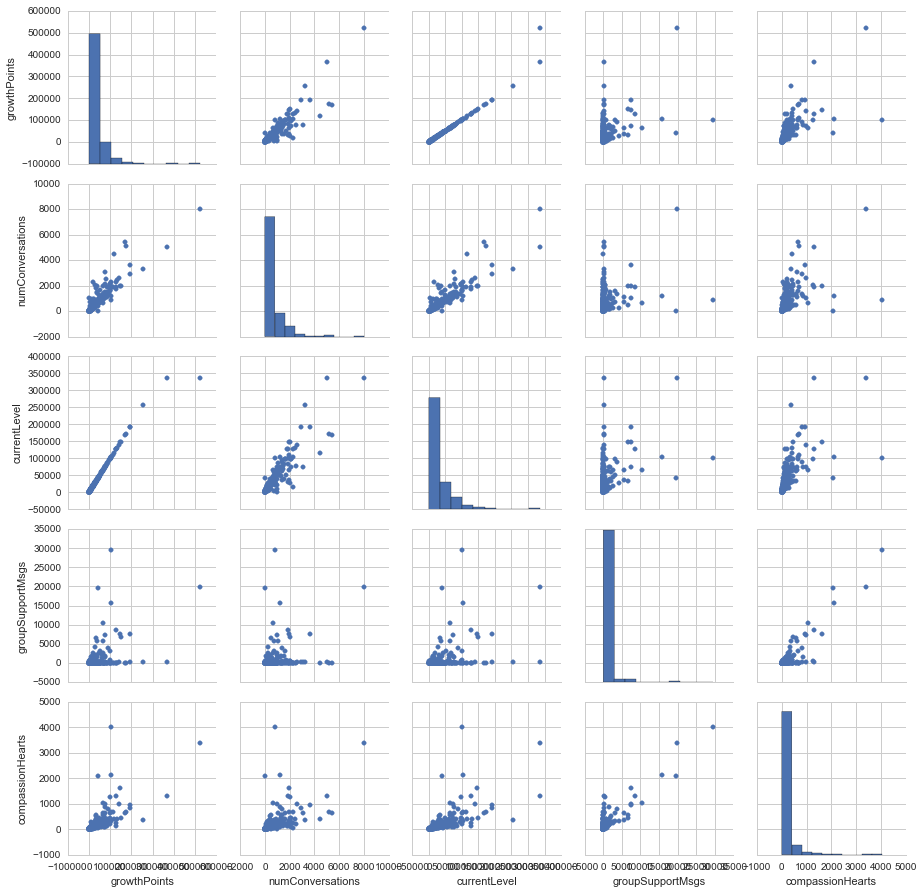

In [33]:
sns.pairplot(freq_har_pairs.dropna())

Pairplot between the features growthPoints, numConversations, currentLevel, groupSupportMsgs, compassionHearts of frequent harassers.

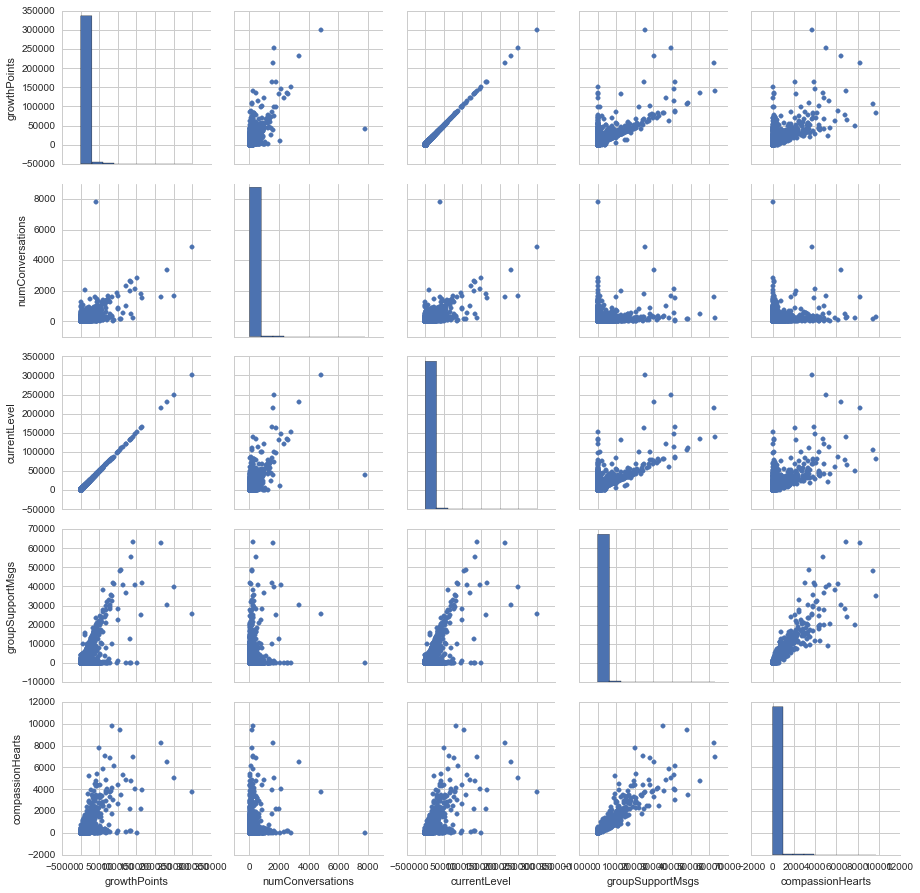

In [36]:
sns.pairplot(active_norm_pairs.dropna())

Pairplot between the features growthPoints, numConversations, currentLevel, groupSupportMsgs, compassionHearts of active normal members.

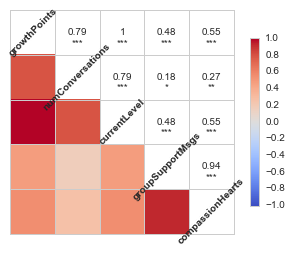

In [37]:
sns.corrplot(active_har_pairs.dropna(),annot=True)

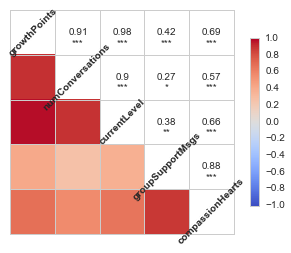

In [38]:
sns.corrplot(freq_har_pairs.dropna(),annot=True)

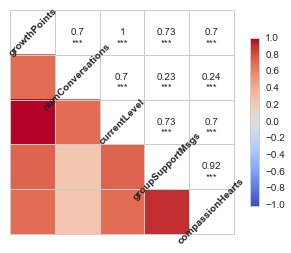

In [39]:
sns.corrplot(active_norm_pairs.dropna(),annot=True)

In [3]:
first = pd.read_csv('first.csv')
first1 = pd.read_csv('first1.csv')

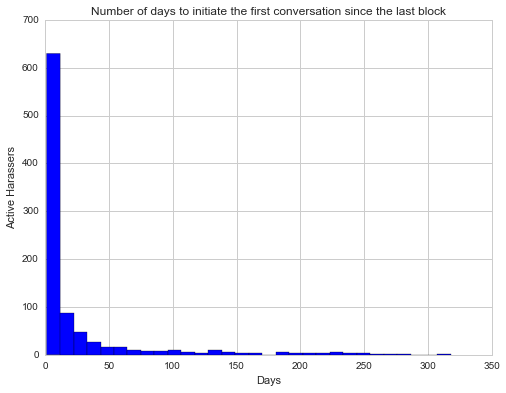

In [10]:
# Number of days to initiate the first conversation since the last block for Active Harassers
plt.figure(figsize=(8, 6))
plt.hist(first['days'],color='blue',bins=30)   
plt.title('Number of days to initiate the first conversation since the last block')
plt.xlabel('Days')
plt.ylabel('Active Harassers')

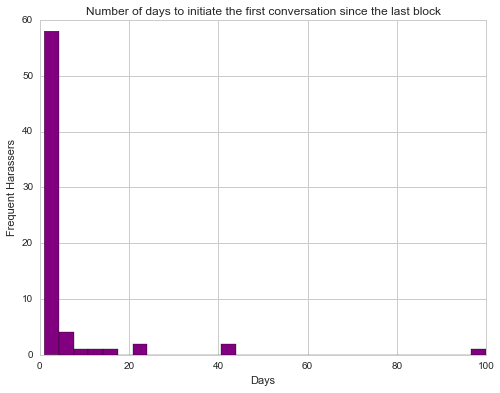

In [9]:
# Number of days to initiate the first conversation since the last block for Frequent Harassers
plt.figure(figsize=(8, 6))
plt.hist(first1['days'],color='purple',bins=30)   
plt.title('Number of days to initiate the first conversation since the last block')
plt.xlabel('Days')
plt.ylabel('Frequent Harassers')